In [26]:
library(Seurat)
library(ggplot2)
library(ggsci)
library(RColorBrewer)
library(pheatmap)
library(dplyr)

In [2]:
load(file = '/data/Matthew/scrna/02.Clustering/crov7_alv_mincell5.Rdata')

In [3]:
meanexp_alevin <- AverageExpression(seurat_obj)
write.csv(meanexp_alevin, 'cro_combine_avgexp.csv')

In [4]:
meanexp_alevin$RNA %>% summary()

       0                   1                   2            
 Min.   :  0.00000   Min.   :  0.00000   Min.   :  0.00000  
 1st Qu.:  0.00678   1st Qu.:  0.00627   1st Qu.:  0.00691  
 Median :  0.05817   Median :  0.05652   Median :  0.05964  
 Mean   :  0.50756   Mean   :  0.50756   Mean   :  0.50756  
 3rd Qu.:  0.24919   3rd Qu.:  0.25327   3rd Qu.:  0.25663  
 Max.   :162.70045   Max.   :156.81588   Max.   :157.68755  
       3                   4                  5                  6           
 Min.   :  0.00000   Min.   :  0.0000   Min.   :  0.0000   Min.   : 0.00000  
 1st Qu.:  0.00943   1st Qu.:  0.0024   1st Qu.:  0.0062   1st Qu.: 0.01000  
 Median :  0.06115   Median :  0.0255   Median :  0.0488   Median : 0.07172  
 Mean   :  0.50756   Mean   :  0.5076   Mean   :  0.5076   Mean   : 0.50756  
 3rd Qu.:  0.23329   3rd Qu.:  0.1329   3rd Qu.:  0.1966   3rd Qu.: 0.29083  
 Max.   :202.83619   Max.   :438.9157   Max.   :408.7358   Max.   :79.82103  
       7                   

In [3]:
cluster_mean_alevin <- AverageExpression(seurat_obj, features = VariableFeatures(seurat_obj))[['RNA']]
# cluster_mean_alevin <- tibble::rownames_to_column(as.data.frame(cluster_mean_alevin[['RNA']]))


In [5]:
head(cluster_mean_alevin)
dim(cluster_mean_alevin)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
EVM0012714,0.97279241,0.86443777,1.72233865,1.42906619,2.44302880,3.9293431,1.11906084,14.0655480,211.0011498,1.71648056,2.4801450,2.95516545,1.52626474,5.7280834
EVM0034564,0.33217022,0.32795249,0.48112656,0.51661826,0.80605410,1.3457962,0.33517634,5.1461493,69.9268583,0.57817047,0.7431229,0.96398611,0.32476362,1.9096614
EVM0033736,0.05372527,0.04041038,0.08835504,0.03508836,0.03457946,0.2138890,0.09237965,0.3733788,19.7555109,0.08285287,0.4280135,0.03229125,0.15784112,0.3169117
EVM0021169,0.17738261,0.16284841,0.10787225,0.26316961,0.25416953,0.4711651,0.17339455,0.9979384,19.7478110,0.24216409,0.1797019,0.28708344,0.08620804,0.3156765
EVM0013196,0.23371389,0.11218249,0.46217635,0.25439150,0.23565285,0.3597622,0.23069193,1.5600345,0.2894348,0.50178665,0.4521085,0.20241288,70.16783607,2.1638644
EVM0005290,0.32698032,0.14565905,0.27914529,0.26227926,0.43128088,0.8372822,14.61078625,5.8746600,0.9667002,107.71758458,0.2356716,0.38999722,0.25357953,0.4071222


[1] 2000   14

In [23]:
id_path <- '/data/Matthew/scrna/02.Clustering/id_latest/'
cp_id <- readLines(paste(id_path, "newcp.gene.id",sep = "/"))
check_cp<- rownames(cluster_mean_alevin) %in% cp_id
length(cp_id)
table(check_cp)

[1] 71

check_cp
FALSE  TRUE 
 1995     5 

In [21]:
dim(cluster_mean_alevin[!check_cp,])
cluster_mean_alevin_nocp <- cluster_mean_alevin[!check_cp,] %>% as.data.frame()

[1] 1985   14

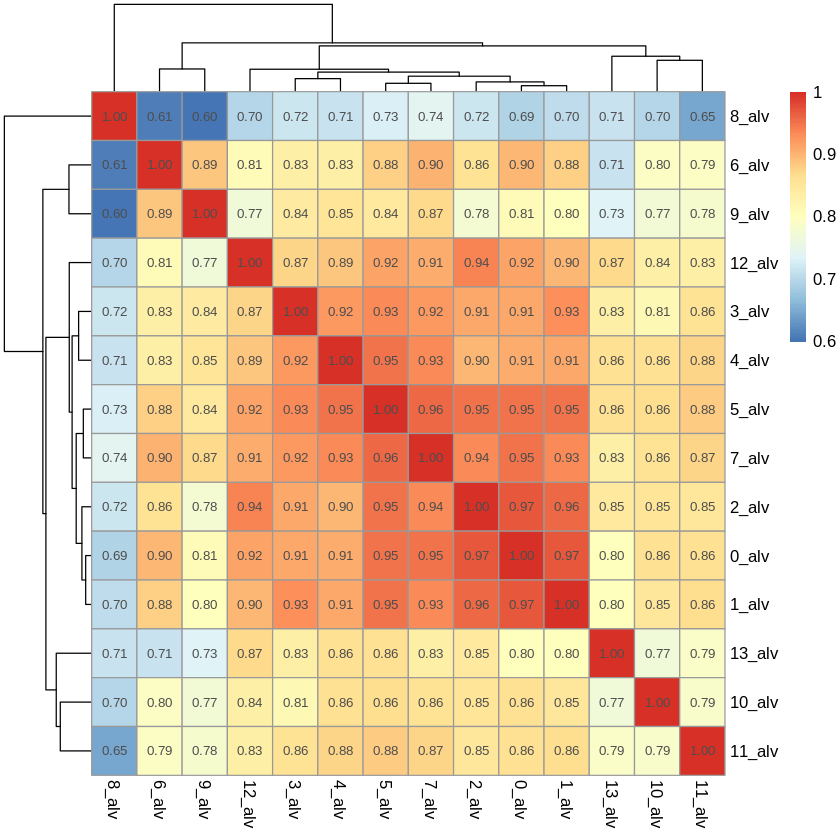

In [13]:
cor_cluster_mean <- cor(cluster_mean_alevin[-1], method = "sp")
pheatmap::pheatmap(cor_cluster_mean,
         display_numbers = T)

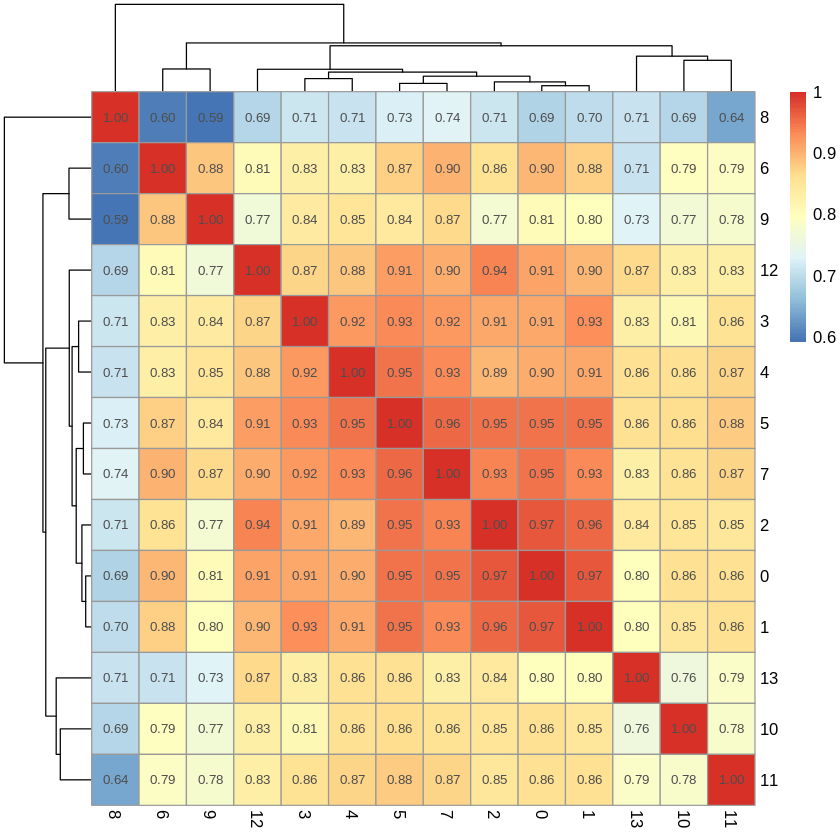

In [25]:
cor_cluster_mean <- cor(cluster_mean_alevin_nocp, method = "sp")
pheatmap::pheatmap(cor_cluster_mean,
         display_numbers = T)

# Cell Ranger

In [8]:
load(file = '/data/Matthew/scrna/02.Clustering/crov7_cr_mincell5.Rdata')

In [9]:
meanexp_cr <- AverageExpression(seurat_obj)
# write.csv(meanexp_alevin, 'cro_combine_avgexp.csv')

In [10]:
meanexp_cr$RNA %>% summary()

       0                   1                   2                   3           
 Min.   :  0.00000   Min.   :  0.00000   Min.   :  0.00000   Min.   :  0.0000  
 1st Qu.:  0.00911   1st Qu.:  0.00753   1st Qu.:  0.00966   1st Qu.:  0.0040  
 Median :  0.07168   Median :  0.06070   Median :  0.07390   Median :  0.0368  
 Mean   :  0.52997   Mean   :  0.52997   Mean   :  0.52997   Mean   :  0.5300  
 3rd Qu.:  0.29184   3rd Qu.:  0.26868   3rd Qu.:  0.30118   3rd Qu.:  0.1698  
 Max.   :175.81494   Max.   :135.85148   Max.   :132.11917   Max.   :464.6870  
       4                   5                   6                  7            
 Min.   :  0.00000   Min.   :  0.00000   Min.   : 0.00000   Min.   :  0.00000  
 1st Qu.:  0.00447   1st Qu.:  0.01269   1st Qu.: 0.01263   1st Qu.:  0.01556  
 Median :  0.04206   Median :  0.07857   Median : 0.08554   Median :  0.09630  
 Mean   :  0.52997   Mean   :  0.52997   Mean   : 0.52997   Mean   :  0.52997  
 3rd Qu.:  0.19556   3rd Qu.:  0.28984  

In [11]:
cluster_mean_cr <- AverageExpression(seurat_obj, features = VariableFeatures(seurat_obj))[['RNA']]
# cluster_mean_cr <- tibble::rownames_to_column(as.data.frame(cluster_mean_cr[['RNA']]))


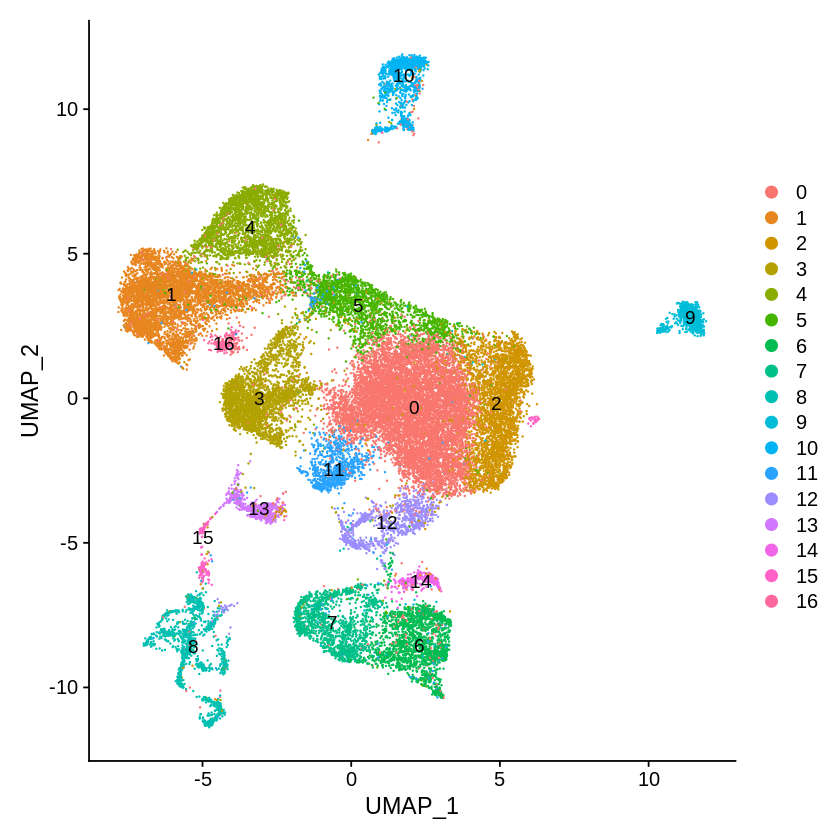

In [14]:
DimPlot(seurat_obj, reduction = "umap", label = TRUE)

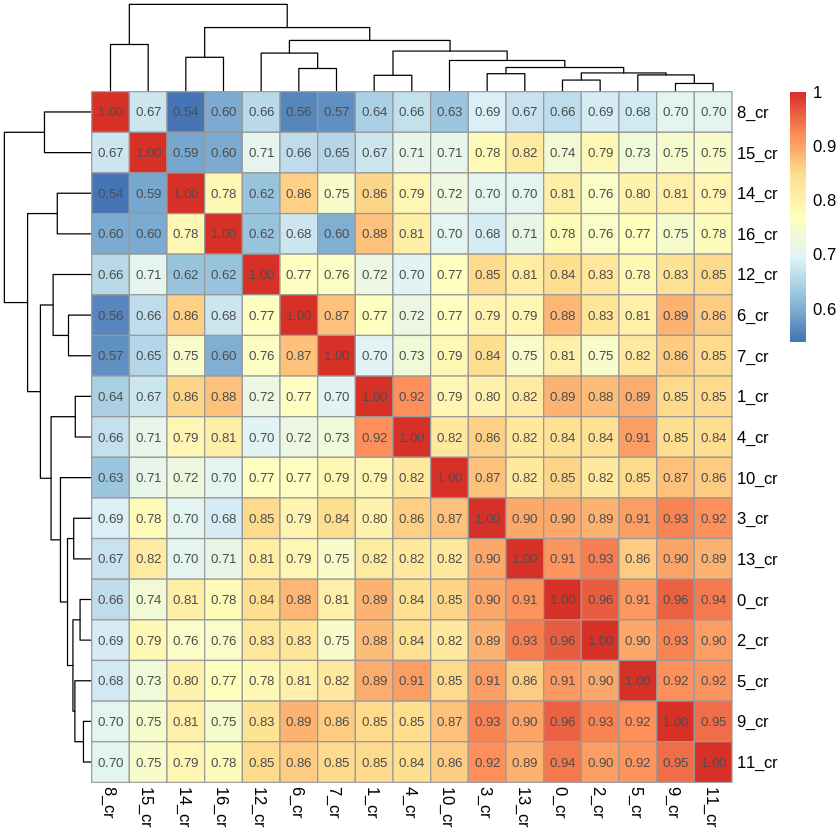

In [17]:
cor_cluster_mean <- cor(cluster_mean_cr[-1], method = "sp")
pheatmap::pheatmap(cor_cluster_mean,
         display_numbers = T)

In [14]:
cr_idents <- Idents(seurat_obj)

In [22]:
write.csv(cr_idents, file = 'cr.idents.csv')
write.csv(alv_idents, file = 'alv.idents.csv')

# compare alv and cell ranger expression

In [7]:
colnames(cluster_mean_alevin) <- paste0(colnames(cluster_mean_alevin), "_alv") 
cluster_mean_alevin <- cluster_mean_alevin %>%
    as.data.frame() %>%
    tibble::rownames_to_column()
head(cluster_mean_alevin)

,rowname,0_alv,1_alv,2_alv,3_alv,4_alv,5_alv,6_alv,7_alv,8_alv,9_alv,10_alv,11_alv,12_alv,13_alv
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,EVM0012714,0.97279241,0.86443777,1.72233865,1.42906619,2.44302880,3.9293431,1.11906084,14.0655480,211.0011498,1.71648056,2.4801450,2.95516545,1.52626474,5.7280834
2,EVM0034564,0.33217022,0.32795249,0.48112656,0.51661826,0.80605410,1.3457962,0.33517634,5.1461493,69.9268583,0.57817047,0.7431229,0.96398611,0.32476362,1.9096614
3,EVM0033736,0.05372527,0.04041038,0.08835504,0.03508836,0.03457946,0.2138890,0.09237965,0.3733788,19.7555109,0.08285287,0.4280135,0.03229125,0.15784112,0.3169117
4,EVM0021169,0.17738261,0.16284841,0.10787225,0.26316961,0.25416953,0.4711651,0.17339455,0.9979384,19.7478110,0.24216409,0.1797019,0.28708344,0.08620804,0.3156765
5,EVM0013196,0.23371389,0.11218249,0.46217635,0.25439150,0.23565285,0.3597622,0.23069193,1.5600345,0.2894348,0.50178665,0.4521085,0.20241288,70.16783607,2.1638644
6,EVM0005290,0.32698032,0.14565905,0.27914529,0.26227926,0.43128088,0.8372822,14.61078625,5.8746600,0.9667002,107.71758458,0.2356716,0.38999722,0.25357953,0.4071222


In [16]:
colnames(cluster_mean_cr) <- paste0(colnames(cluster_mean_cr), "_cr") 
cluster_mean_cr <- cluster_mean_cr %>%
    as.data.frame() %>%
    tibble::rownames_to_column()
head(cluster_mean_cr)

,rowname,0_cr,1_cr,2_cr,3_cr,4_cr,5_cr,6_cr,7_cr,8_cr,9_cr,10_cr,11_cr,12_cr,13_cr,14_cr,15_cr,16_cr
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,EVM0012714,1.10770183,1.393060926,1.98173797,2.14517676,7.12746829,0.94421411,0.86685856,3.3211699,209.5761409,13.6345376,4.71869920,4.6654452,2.9056098,1.52572335,3.275287128,12.1552832,15.15003064
2,EVM0034564,0.34941439,0.506695436,0.57600107,0.60699013,2.54099899,0.25316869,0.27793687,0.9089578,67.7169378,5.0203341,1.43457618,1.0691241,0.8685933,0.35329259,1.011880142,3.6821639,6.77621729
3,EVM0021169,0.16336508,0.235930396,0.11927433,0.13629518,1.03668370,0.17368925,0.14968056,0.2702287,19.2757200,1.0175997,0.39715266,0.3202291,0.2085657,0.08055239,0.549366691,0.3175405,2.76649298
4,EVM0033736,0.05434798,0.002234672,0.11835572,0.07445552,0.00000000,0.04407567,0.07976059,0.1223337,18.8373619,0.4356443,0.03486295,0.1404696,0.5474054,0.14880918,0.004233191,0.7540941,0.00000000
5,EVM0013196,0.33069425,0.030238282,0.70928457,0.51058178,0.09591243,0.31768268,0.29409186,0.6950443,0.3851340,1.7874892,0.43596084,0.7241280,0.5955352,83.06146508,0.044782946,5.4416287,0.02419995
6,EVM0005656,0.05340510,0.001670603,0.03243336,0.13348185,0.00000000,0.02668288,0.06264667,0.1564850,0.1386071,0.3507070,0.21195048,0.2672445,7.3503092,0.07003154,0.000000000,0.1271525,0.00000000


In [18]:
cluster_mean <- inner_join(cluster_mean_alevin, cluster_mean_cr)

Joining, by = "rowname"



In [19]:
head(cluster_mean)

,rowname,0_alv,1_alv,2_alv,3_alv,4_alv,5_alv,6_alv,7_alv,8_alv,⋯,7_cr,8_cr,9_cr,10_cr,11_cr,12_cr,13_cr,14_cr,15_cr,16_cr
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,EVM0012714,0.97279241,0.86443777,1.72233865,1.42906619,2.44302880,3.9293431,1.11906084,14.0655480,211.0011498,⋯,3.3211699,209.576141,13.6345376,4.71869920,4.6654452,2.9056098,1.52572335,3.275287128,12.1552832,15.15003064
2,EVM0034564,0.33217022,0.32795249,0.48112656,0.51661826,0.80605410,1.3457962,0.33517634,5.1461493,69.9268583,⋯,0.9089578,67.716938,5.0203341,1.43457618,1.0691241,0.8685933,0.35329259,1.011880142,3.6821639,6.77621729
3,EVM0033736,0.05372527,0.04041038,0.08835504,0.03508836,0.03457946,0.2138890,0.09237965,0.3733788,19.7555109,⋯,0.1223337,18.837362,0.4356443,0.03486295,0.1404696,0.5474054,0.14880918,0.004233191,0.7540941,0.00000000
4,EVM0021169,0.17738261,0.16284841,0.10787225,0.26316961,0.25416953,0.4711651,0.17339455,0.9979384,19.7478110,⋯,0.2702287,19.275720,1.0175997,0.39715266,0.3202291,0.2085657,0.08055239,0.549366691,0.3175405,2.76649298
5,EVM0013196,0.23371389,0.11218249,0.46217635,0.25439150,0.23565285,0.3597622,0.23069193,1.5600345,0.2894348,⋯,0.6950443,0.385134,1.7874892,0.43596084,0.7241280,0.5955352,83.06146508,0.044782946,5.4416287,0.02419995
6,EVM0005290,0.32698032,0.14565905,0.27914529,0.26227926,0.43128088,0.8372822,14.61078625,5.8746600,0.9667002,⋯,98.0564242,1.343017,5.7938131,0.89776730,2.2702856,0.4005429,0.44939947,0.469839283,1.1479939,0.09184808


In [20]:
options(repr.plot.height = 8, repr.plot.width = 8)
cor_cluster_mean <- cor(cluster_mean[-1], method = "sp")
pheatmap::pheatmap(cor_cluster_mean,
                   display_numbers = F,
                   cluster_rows = T,
                   cluster_cols = T,
                   filename = "alv_cr_cor_heatmap.pdf"
                  )